In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sns
sns.set_style('dark')
%pip install pycountry_convert
import pycountry_convert as pc

Note: you may need to restart the kernel to use updated packages.
  Using cached pycountry_convert-0.7.2-py3-none-any.whl (13 kB)
  Using cached pytest-7.1.2-py3-none-any.whl (297 kB)
  Using cached pycountry-22.3.5-py2.py3-none-any.whl
  Using cached pytest_mock-3.8.2-py3-none-any.whl (9.1 kB)
  Using cached pprintpp-0.4.0-py2.py3-none-any.whl (16 kB)
  Using cached pytest_cov-3.0.0-py3-none-any.whl (20 kB)
  Using cached repoze.lru-0.7-py3-none-any.whl (10 kB)
  Using cached iniconfig-1.1.1-py2.py3-none-any.whl (5.0 kB)
  Using cached atomicwrites-1.4.1-py2.py3-none-any.whl
     -------------------------------------- 58.8/58.8 kB 783.1 kB/s eta 0:00:00
  Using cached tomli-2.0.1-py3-none-any.whl (12 kB)
  Using cached py-1.11.0-py2.py3-none-any.whl (98 kB)
  Using cached pluggy-1.0.0-py2.py3-none-any.whl (13 kB)
  Using cached coverage-6.4.2-cp39-cp39-win_amd64.whl (187 kB)
Note: you may need to restart the kernel to use updated packages.


In [52]:
# from https://stackoverflow.com/questions/55910004/get-continent-name-from-country-using-pycountry

def country_to_continent(row):
    country_name=row['Country']

    Europe_list=['Euro area','Britain']
    if country_name in Europe_list:
        return 'Europe'
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    
    return country_continent_name

In [48]:
%pip install xlrd
big_mac_df=pd.read_excel('data/big-mac-2022-07-01.xls',sheet_name=0)
big_mac_df.head()

Note: you may need to restart the kernel to use updated packages.


,Country,iso_a3,currency_code,local_price,dollar_ex,dollar_price,dollar_ppp,GDP_bigmac,dollar_valuation,euro_valuation,sterling_valuation,yen_valuation,yuan_valuation,dollar_adj_valuation,euro_adj_valuation,sterling_adj_valuation,yen_adj_valuation,yuan_adj_valuation
0,Switzerland,CHE,CHF,6.50,0.96845,6.711756,1.262136,67857.662938,30.325,40.853,51.165,137.261,88.694,31.013,25.768,39.572,127.382,51.915
1,Norway,NOR,NOK,62.00,9.89765,6.264113,12.038835,63567.854704,21.633,31.459,41.083,121.436,76.109,24.323,19.346,32.445,115.772,44.158
2,Uruguay,URY,UYU,255.00,41.91000,6.084467,49.514563,14726.863618,18.145,27.689,37.037,115.086,71.058,49.213,43.239,58.961,158.970,73.019
3,Sweden,SWE,SEK,57.00,10.19785,5.589413,11.067961,46516.137374,8.532,17.300,25.888,97.586,57.141,18.845,14.087,26.609,106.264,37.806
4,Canada,CAN,CAD,6.77,1.28915,5.251522,1.314563,49674.334129,1.971,10.209,18.277,85.641,47.641,10.205,5.793,17.404,91.268,27.787


In [49]:
big_mac_df.Country.unique()

array(['Switzerland', 'Norway', 'Uruguay', 'Sweden', 'Canada',
       'United States', 'Lebanon', 'Israel', 'United Arab Emirates',
       'Euro area', 'Australia', 'Argentina', 'Saudi Arabia', 'Britain',
       'New Zealand', 'Brazil', 'Bahrain', 'Singapore', 'Kuwait',
       'Czech Republic', 'Costa Rica', 'Nicaragua', 'Sri Lanka', 'Oman',
       'Croatia', 'Chile', 'Honduras', 'Poland', 'Peru', 'Qatar', 'China',
       'South Korea', 'Thailand', 'Colombia', 'Mexico', 'Guatemala',
       'Jordan', 'Pakistan', 'Moldova', 'Vietnam', 'Japan', 'Azerbaijan',
       'Philippines', 'Turkey', 'Hong Kong', 'Hungary', 'Taiwan',
       'Malaysia', 'Egypt', 'India', 'South Africa', 'Indonesia',
       'Romania', 'Venezuela'], dtype=object)

In [25]:
big_mac_df.columns

Index(['Country', 'iso_a3', 'currency_code', 'local_price', 'dollar_ex',
       'dollar_price', 'dollar_ppp', 'GDP_bigmac', 'dollar_valuation',
       'euro_valuation', 'sterling_valuation', 'yen_valuation',
       'yuan_valuation', 'dollar_adj_valuation', 'euro_adj_valuation',
       'sterling_adj_valuation', 'yen_adj_valuation', 'yuan_adj_valuation'],
      dtype='object')

In [43]:
xrate_index_df=big_mac_df[['Country','dollar_ex','dollar_ppp']]

In [54]:
xrate_index_df['Continent']=xrate_index_df.apply(country_to_continent,axis=1)
xrate_index_df

,Country,dollar_ex,dollar_ppp,Continent
0,United Arab Emirates,3.673150,3.060166,Asia
1,Argentina,60.065600,35.477178,South America
2,Australia,1.449065,1.338174,Oceania
3,Azerbaijan,1.696500,0.819502,Asia
4,Bahrain,0.377000,0.290456,Asia
5,Brazil,4.141900,4.128631,South America
6,Canada,1.306550,1.404564,North America
7,Switzerland,0.968250,1.348548,Europe
8,Chile,772.740000,547.717842,South America
9,China,6.885000,4.460581,Asia


## Hue by continent

c:\Users\junho\anaconda3\envs\bakjun\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'The Big Mac Index and Currency Exchange Rate')

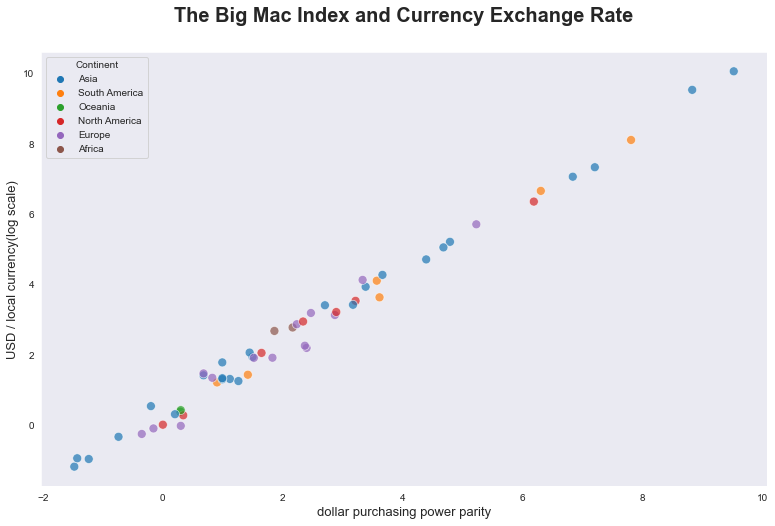

In [73]:
_,ax=plt.subplots(1,1,figsize=(13,8))
sns.scatterplot(np.log(xrate_index_df['dollar_ppp']),np.log(xrate_index_df['dollar_ex']),ax=ax,hue='Continent',data=xrate_index_df,s=80,alpha=.7)
ax.set_xlabel('dollar purchasing power parity',fontsize=13)
ax.set_ylabel('USD / local currency(log scale)',fontsize=13)
ax.set_title('The Big Mac Index and Currency Exchange Rate',fontsize=20,fontweight='bold',pad=30)

In [70]:
xrate_index_df.groupby('Continent')['dollar_ppp'].count()

Continent
Africa            2
Asia             25
Europe           14
North America     7
Oceania           2
South America     6
Name: dollar_ppp, dtype: int64

# distribution by continent